# Chemical space visualization for hybrid perovskite single crystal data
    ## Author: Zhi Li
    ## Version 1.1
    ## 11-18-2019

In [8]:
import os, fnmatch
import matplotlib as mpl
import math
import numpy as np
from numpy import *
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from matplotlib.colors import Normalize
from sklearn.preprocessing import StandardScaler, Normalizer
from scipy.spatial.distance import pdist, cdist, squareform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA, KernelPCA
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import optunity
import optunity.metrics

In [11]:
stat = pd.read_csv("cddd_embeddings.csv")
Chemfit = stat.drop(['smiles', 'new_smiles'], axis = 1)
Chemfit_std = Chemfit.copy()

In [21]:
Chemfit_std = Chemfit_std.drop([2,3,6,12])

In [22]:
prepro = Normalizer() # StandardScaler() or Normalizer()

In [23]:
# Transform the dataset
for feature_name in Chemfit_std.columns:
    Chemfit_std[feature_name] = prepro.fit_transform(Chemfit_std[feature_name].values.reshape(-1, 1))

In [24]:
# Principal Component Analysis
pca = PCA(n_components = 2)
pca.fit(Chemfit_std)
Chemfit_proj = pca.transform(Chemfit_std)

<IPython.core.display.Javascript object>


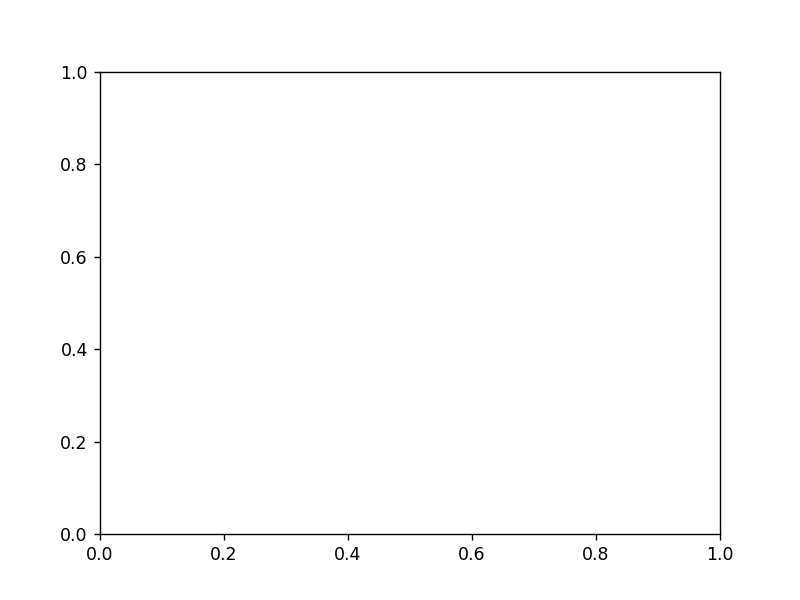

KeyError: 'likelihood of class 4'

In [25]:
%matplotlib notebook
fig, ax = plt.subplots()

# plot unsuccessful one
im = ax.scatter(Chemfit_proj[:, 0][stat['likelihood of class 4']==0], \
                Chemfit_proj[:, 1][stat['likelihood of class 4']==0], \
                c = 'black', \
                s = (np.array(stat['exp space vol'])[stat['likelihood of class 4']==0])*12, alpha = 0.5)

# plot successful one
im = ax.scatter(Chemfit_proj[:, 0][stat['likelihood of class 4']!=0], \
                Chemfit_proj[:, 1][stat['likelihood of class 4']!=0], \
                c = np.array(stat['likelihood of class 4'])[stat['likelihood of class 4']!=0], \
                s = (np.array(stat['exp space vol'])[stat['likelihood of class 4']!=0])*12, cmap = 'rainbow', alpha = 0.5)
fig.colorbar(im, ax=ax)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

for i, txt in enumerate(np.array(range(45))):
    ax.annotate(txt, (np.array(Chemfit_proj[:,0])[i], np.array(Chemfit_proj[:, 1])[i]))

#plt.xlim(-1.5,1.5)
#plt.ylim(-1.5, 3)
plt.savefig('Graphs/PCA_norm_cddd.svg', format = "svg", transparent=True)

In [62]:
Chemfit.shape[1]

67

In [75]:
x = ma.log10(np.abs(pca.components_[0]))
print (x.filled(0))

[-15.69097504 -17.35974485 -15.97832434 -16.19086995 -17.16141736
  -1.02253046  -0.52834313  -1.73755459  -0.52834313 -16.00395495
  -1.54741642  -0.55603454  -0.51385128  -1.12246025 -17.2425678
  -0.40760846  -0.40760846  -0.40760846  -1.17657501  -1.73755459
  -1.42606532   0.          -0.40760846   0.           0.
  -0.9663617  -17.97564478 -17.08281016   0.         -16.66583654
   0.         -17.47928325 -18.10033973 -17.64481868 -17.86511554
 -18.71863824  -1.42047642 -18.83880614 -19.04337599 -32.1838806
  -1.53843768  -1.53843768 -32.99926164 -33.19625996  -1.65064768
  -1.45331267  -1.94597074  -1.87595416   0.          -1.73755459
  -1.94597074  -1.80126445   0.          -1.80126445  -1.94037023
  -1.9195236   -1.73755459   0.           0.           0.
   0.           0.           0.           0.           0.
  -1.53843768   0.        ]


In [146]:
# Compute principal component vectors
theta = np.linspace(0.0, 2 * np.pi, Chemfit.shape[1], endpoint=False)
radii = np.abs(pca.components_[1])
width = 2*np.pi / Chemfit.shape[1]
colors = plt.cm.cividis(pca.components_[1])

ax2 = plt.subplot(111, projection='polar')
ax2.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

ax2.set_xticks(theta)
ax2.set_xticklabels(list(map(str, range(1,Chemfit.shape[1]+1))))
ax2.yaxis.grid(True)
plt.show()

plt.savefig('Graphs/PCA_com2.svg', format = "svg", transparent=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


In [164]:
list(Chemfit.columns.values)[25]

'_feat_WienerPolarity'

In [172]:
Chemfit['ammonium name']

KeyError: 'ammonium name'

In [173]:
stat['ammonium name']

0                           Methylammonium iodide
1                            Ethylammonium Iodide
2                          n-Butylammonium iodide
3                            Formamidinium Iodide
4                            Acetamidinium iodide
5                 Cyclohexylmethylammonium iodide
6                        iso-Butylammonium iodide
7                         Dimethylammonium iodide
8                        n-Dodecylammonium iodide
9                            Pyrrolidinium Iodide
10              4-Fluoro-Phenethylammonium iodide
11                         t-Butylammonium Iodide
12                 4-Fluoro-Benzylammonium iodide
13                      Cyclohexylammonium iodide
14                            Morpholinium Iodide
15                            Piperidinium Iodide
16                         n-Hexylammonium iodide
17       N,N-Diethylpropane-1,3-diammonium iodide
18     N,N-dimethylpropane- 1,3-diammonium iodide
19      N,N-Dimethylethane- 1,2-diammonium iodide
